In [21]:
import pandas as pd
import numpy as np
import os
from tqdm._tqdm_notebook import tnrange

filepath='POI_category.csv'

poi=pd.read_csv(filepath,header=0)
#poi.columns=['place_id','spatial_id','chain_id','category_ids','latitude','longitude','names','address','city','state','zip-code','cbg','dma_id','cbsa_id','local_timezone','opening_date','closing_date','is_open','is_high_confidence','is_multiuse','closed_hours','ceiling_scores','category']

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10,11,17,18,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [24]:
poi

,place_id,spatial_id,chain_id,category_ids,latitude,longitude,names,address,city,state,...,cbsa_id,local_timezone,opening_date,closing_date,is_open,is_high_confidence,is_multiuse,closed_hours,ceiling_scores,category
0,13857077,7.190000e+17,post-office,"42150000,piq-retail,piq-office-supply-stores,p...",43.65546,-96.20487,Post Office - Luverne,407 E Lincoln St,Luverne,MN,...,182.0,America/Chicago,NaN,NaN,True,False,False,NaN,0.633812,retail
1,14180901,7.200000e+17,non_chain,"50230500,57120000,piq-retail,piq-furniture-and...",44.84050,-93.79290,Real Deals On Home Decor,10580 10th St,Waconia,MN,...,1182.0,America/Chicago,NaN,NaN,True,False,False,NaN,0.90963,retail
2,24656420,7.200000e+17,msc-industrial-supply,"52510000,piq-retail,piq-home-improvement,piq-h...",44.86399,-93.40785,"Minneapolis, Mn",7672 Golden Triangle Dr.,Eden Prairie,MN,...,1182.0,America/Chicago,NaN,NaN,True,False,False,NaN,1,retail
3,24695293,7.200000e+17,non_chain,"60290000,piq-financial-services,piq-banks,6081...",44.95316,-93.10500,St Mn - Transportation Building,395 John Ireland Blvd,St Paul,MN,...,1182.0,America/Chicago,NaN,NaN,True,True,False,NaN,1,financial
4,23994395,7.200000e+17,non_chain,"72310000,72410000,piq-retail,piq-health-and-be...",44.05169,-91.63300,All Family Hair Care,166 E 3rd St,Winona,MN,...,549.0,America/Chicago,NaN,NaN,True,False,False,NaN,0.190658,retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73160,17943915,8.160000e+17,american-family-insurance,"64110300,64110000,piq-financial-services,piq-i...",45.57485,-93.22457,"American Family Insurance,Jeffrey Pynes Agent",305 Main St Ste A,Cambridge,MN,...,1182.0,America/Chicago,NaN,NaN,True,False,False,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,3...",0.51744,financial
73161,18069399,1.440000e+17,non_chain,"82210100,82210101,piq-educational-institutions",44.98164,-93.18112,NaN,NaN,NaN,MN,...,1182.0,America/Chicago,NaN,NaN,True,True,False,NaN,0.333084,educational
73162,13976230,7.200000e+17,non_chain,"59219900,51820200,piq-retail,piq-liquor-stores",44.08549,-93.21792,Vine Street Liquors,108 E Vine St,Owatonna,MN,...,589.0,America/Chicago,NaN,NaN,True,False,False,NaN,0.549367,retail
73163,1242497,8.160000e+17,non_chain,"61620000,piq-financial-services,piq-banks",45.06925,-93.44394,First Class Mortgage,12906 63rd Ave,Osseo,MN,...,1182.0,America/Chicago,NaN,NaN,True,False,False,NaN,1,financial


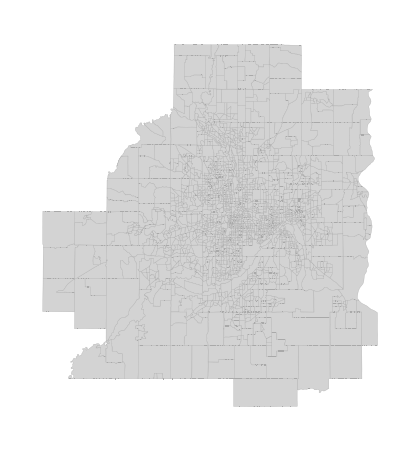

In [25]:
import os
import geopandas as gpd

cbg_path='D:\\GNN\\sample_data_mn_20200301-20220424T172614Z-001\\sample_data_mn_20200301\\'

cbg = gpd.read_file(cbg_path+"geo/cbg_TCMA.geojson")
import geoplot
import geoplot.crs as gcrs

geoplot.polyplot(cbg, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))


In [26]:
gdf_poi= gpd.GeoDataFrame(
    poi, geometry=gpd.points_from_xy(poi.longitude, poi.latitude))

gdf_poi.crs= "EPSG:4326" 
gdf_poi=gdf_poi.to_crs(cbg.crs)
poi_with_cbg = gpd.sjoin(gdf_poi, cbg, how="inner")

In [27]:
poi_with_cbg

,place_id,spatial_id,chain_id,category_ids,latitude,longitude,names,address,city,state,...,geometry,index_right,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode
1,14180901,7.200000e+17,non_chain,"50230500,57120000,piq-retail,piq-furniture-and...",44.84050,-93.79290,Real Deals On Home Decor,10580 10th St,Waconia,MN,...,POINT (-93.79290 44.84050),4,27,019,090302,1,270190903021,MN,Carver County,H1
77,23603952,1.440000e+17,non_chain,"58120300,piq-dining,piq-qsr",44.84186,-93.78947,Subway,NaN,NaN,MN,...,POINT (-93.78947 44.84186),4,27,019,090302,1,270190903021,MN,Carver County,H1
882,7788019,7.200000e+17,fastenal,"52510000,piq-retail,piq-home-improvement,piq-h...",44.83764,-93.78983,"Mnwac - Waconia, Mn Usa 55387,Fastenal",225 Industrial Blvd,Waconia,MN,...,POINT (-93.78983 44.83764),4,27,019,090302,1,270190903021,MN,Carver County,H1
1856,9298111,7.200000e+17,ace-hardware,"52510000,piq-retail,piq-home-improvement,piq-h...",44.84158,-93.78682,"UFC Farm Supply (Ace Hardware store 6995),Ace ...",801 State Highway 284,Waconia,MN,...,POINT (-93.78682 44.84158),4,27,019,090302,1,270190903021,MN,Carver County,H1
3824,24282884,7.200000e+17,non_chain,"52510000,50840500,35410300,89990000,piq-retail...",44.83274,-93.80103,Milltronics Mfg Co,1400 Mill Ln,Waconia,MN,...,POINT (-93.80103 44.83274),4,27,019,090302,1,270190903021,MN,Carver County,H1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72925,11395978,3.030000e+18,non_chain,"59219900,piq-retail,piq-liquor-stores",44.80773,-93.59374,Century Liquors,435 Ridge Ln,Chaska,MN,...,POINT (-93.59374 44.80773),1573,27,019,090900,2,270190909002,MN,Carver County,H1
72153,23485788,7.200000e+17,non_chain,"56210000,piq-retail,piq-apparel-and-accessorie...",44.90505,-93.32933,Corset NA,5400 France Ave,Minneapolis,MN,...,POINT (-93.32933 44.90505),564,27,053,023801,1,270530238011,MN,Hennepin County,H1
72607,321492,7.200000e+17,non_chain,"53999903,54990204,54990201,58120000,piq-dining...",44.92472,-93.53846,Cottagewood General Store,20280 Cottagewood Rd,Excelsior,MN,...,POINT (-93.53846 44.92472),1322,27,053,027400,4,270530274004,MN,Hennepin County,H1
72897,25027101,1.440000e+17,non_chain,"82210100,piq-educational-institutions,79970000...",44.94397,-93.18989,"University of St Thomas,University Of St Thoma...",2115 Summit Ave,St Paul,MN,...,POINT (-93.18989 44.94397),311,27,123,034900,1,271230349001,MN,Ramsey County,H1


In [46]:
grouped = poi_with_cbg.groupby('CensusBlockGroup')['category'].value_counts(normalize=False)
result = grouped.reset_index(name='count')


In [47]:
len(result.CensusBlockGroup.unique())

1785

In [54]:
result

,CensusBlockGroup,category,count
0,270030501071,dining,8
1,270030501071,retail,8
2,270030501071,financial,6
3,270030501071,entertainment,1
4,270030501081,retail,10
...,...,...,...
5883,271630714002,retail,5
5884,271630714002,storage,1
5885,271630714003,retail,3
5886,271630714003,motorcycle,1


In [57]:
result_B = pd.pivot_table(result, values='count', index='CensusBlockGroup', columns='category')


In [59]:
result_B.index

Index(['270030501071', '270030501081', '270030501082', '270030501091',
       '270030501092', '270030501093', '270030501101', '270030501102',
       '270030501111', '270030501112',
       ...
       '271630712083', '271630712091', '271630712092', '271630712093',
       '271630713001', '271630713002', '271630714001', '271630714002',
       '271630714003', '271630714004'],
      dtype='object', name='CensusBlockGroup', length=1785)

In [60]:
cbg.index

RangeIndex(start=0, stop=2085, step=1)

In [98]:
cbg.set_index('CensusBlockGroup',inplace=True)


KeyError: "None of ['CensusBlockGroup'] are in the columns"

Index(['270190911001', '270190912011', '270190908002', '270190901002',
       '270190903021', '270190902002', '270190902001', '270190903012',
       '271230353001', '271230338001',
       ...
       '270530027002', '270531108001', '270531093003', '270530121011',
       '270530238013', '270530068002', '270530268073', '270530221022',
       '270531007004', '270531048002'],
      dtype='object', name='CensusBlockGroup', length=2085)

In [64]:
result_poi=pd.concat([cbg,result_B],axis=1)

In [73]:
result_poi=result_poi.fillna(0)
result_poi['CensusBlockGroup']=result_poi.index

In [103]:
result_poi.to_file('D://GNN//cbg_with_poi.geojson', driver='GeoJSON')


In [102]:
cbg=gpd.read_file('cbg_with_poi.geojson')


In [96]:
result_poi

,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,geometry,automotive,business,...,optometrists,pay,real,retail,storage,tech,transportation,travel,truck,CensusBlockGroup
270190911001,27,019,091100,1,MN,Carver County,H1,"MULTIPOLYGON (((-93.76804 44.64280, -93.76804 ...",0.0,0.0,...,0.0,0.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,270190911001
270190912011,27,019,091201,1,MN,Carver County,H1,"MULTIPOLYGON (((-94.01048 44.71880, -94.01047 ...",0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,270190912011
270190908002,27,019,090800,2,MN,Carver County,H1,"MULTIPOLYGON (((-93.61734 44.83011, -93.61261 ...",0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,270190908002
270190901002,27,019,090100,2,MN,Carver County,H1,"MULTIPOLYGON (((-93.88993 44.97638, -93.88990 ...",0.0,0.0,...,0.0,0.0,0.0,17.0,1.0,0.0,0.0,0.0,0.0,270190901002
270190903021,27,019,090302,1,MN,Carver County,H1,"MULTIPOLYGON (((-93.88203 44.80464, -93.87963 ...",3.0,0.0,...,0.0,0.0,0.0,41.0,2.0,0.0,0.0,0.0,0.0,270190903021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270530068002,27,053,006800,2,MN,Hennepin County,H1,"MULTIPOLYGON (((-93.28803 44.95733, -93.28802 ...",0.0,0.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,270530068002
270530268073,27,053,026807,3,MN,Hennepin County,H1,"MULTIPOLYGON (((-93.39212 45.07971, -93.39195 ...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270530268073
270530221022,27,053,022102,2,MN,Hennepin County,H1,"MULTIPOLYGON (((-93.38369 44.95686, -93.38120 ...",0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,270530221022
270531007004,27,053,100700,4,MN,Hennepin County,H1,"MULTIPOLYGON (((-93.31335 45.01867, -93.31208 ...",0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,270531007004


## test if the geopandas is saved

In [92]:
cbg_new = gpd.read_file('cbg_with_poi.geojson')

geoplot.polyplot(cbg_new, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))


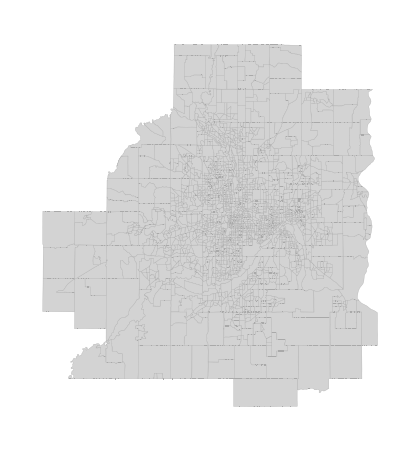